In [1]:
import requests

# Overpass API endpoint to get boundary data (e.g., municipality boundaries)
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
(
  relation["boundary"="administrative"]["name"="Gent"];
);
out body;
"""

# Send the query
response = requests.get(overpass_url, params={'data': overpass_query})
data = response.json()

# Print the result (GeoJSON format)
print(data)


{'version': 0.6, 'generator': 'Overpass API 0.7.62.5 1bd436f1', 'osm3s': {'timestamp_osm_base': '2025-03-14T03:39:28Z', 'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'}, 'elements': [{'type': 'relation', 'id': 897671, 'members': [{'type': 'node', 'ref': 1668655163, 'role': 'admin_centre'}, {'type': 'way', 'ref': 511525413, 'role': 'outer'}, {'type': 'way', 'ref': 483089057, 'role': 'outer'}, {'type': 'way', 'ref': 119760447, 'role': 'outer'}, {'type': 'way', 'ref': 57400963, 'role': 'outer'}, {'type': 'way', 'ref': 56103473, 'role': 'outer'}, {'type': 'way', 'ref': 664678407, 'role': 'outer'}, {'type': 'way', 'ref': 233349286, 'role': 'outer'}, {'type': 'way', 'ref': 665264021, 'role': 'outer'}, {'type': 'way', 'ref': 665264019, 'role': 'outer'}, {'type': 'way', 'ref': 693915361, 'role': 'outer'}, {'type': 'way', 'ref': 665440713, 'role': 'outer'}, {'type': 'way', 'ref': 237115734, 'role': 'outer'}, {'type': 'way',

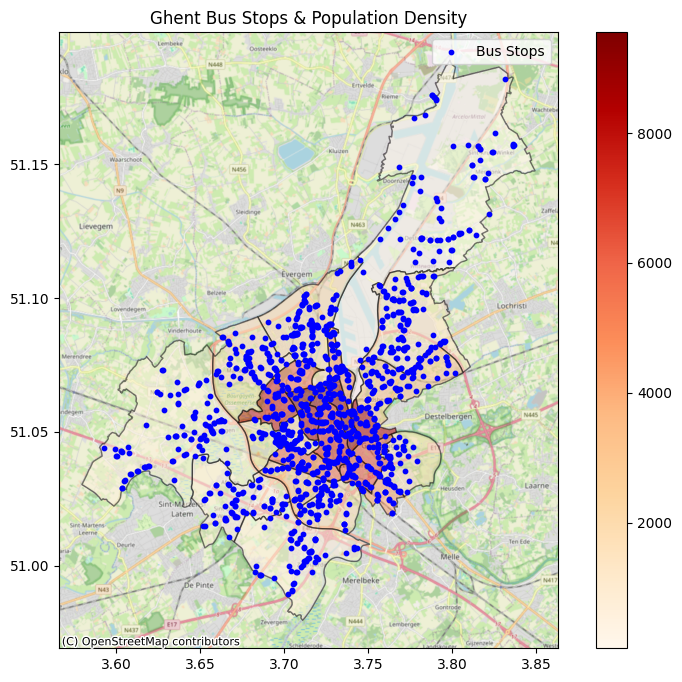

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import json

# Load district boundaries (GeoJSON)
districts = gpd.read_file("stadswijken-gent.geojson")

# Load and process population density (JSON)
with open("PopulationDensity.json", "r", encoding="utf-8") as file:
    population_data = json.load(file)

# Convert JSON to DataFrame
population_df = pd.DataFrame.from_dict(population_data["population_density_2024"],
                                       orient="index",
                                       columns=["population_density"])
population_df.index.name = "district_name"
population_df.reset_index(inplace=True)

# Merge population data with district geometry using "wijk" as the district identifier
districts = districts.merge(population_df, left_on="wijk", right_on="district_name", how="left")

# Load bus stop locations and routes (CSV)
bus_stops = pd.read_csv("bushaltes-gent.csv", delimiter=";")

# Convert bus stops to a GeoDataFrame using correct latitude & longitude
bus_stops_gdf = gpd.GeoDataFrame(bus_stops,
                                 geometry=gpd.points_from_xy(bus_stops["longitude"], bus_stops["latitude"]),
                                 crs="EPSG:4326")

# Plot the map
fig, ax = plt.subplots(figsize=(10, 8))
districts.plot(ax=ax, column="population_density", cmap="OrRd", legend=True, edgecolor="black", alpha=0.5)
bus_stops_gdf.plot(ax=ax, color="blue", markersize=10, label="Bus Stops")

# Add a basemap
ctx.add_basemap(ax, crs=districts.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

plt.legend()
plt.title("Ghent Bus Stops & Population Density")
plt.show()



In [3]:
import geopandas as gpd

# Load the districts GeoJSON
districts = gpd.read_file("stadswijken-gent.geojson")

# Print the column names
print(districts.columns)

# Print the first few rows to inspect
print(districts.head())



Index(['wijziging', 'nieuwnr', 'naam', 'wijk', 'wijknr', 'geo_point_2d',
       'geometry'],
      dtype='object')
  wijziging nieuwnr       naam                          wijk  wijknr  \
0      None       2   Kernstad     Sluizeken - Tolhuis - Ham       2   
1       Nee      16       Oost                    Gentbrugge      16   
2        Ja      11  Noordoost  Gentse Kanaaldorpen en -zone      11   
3        Ja      20       Zuid               Nieuw Gent - UZ      20   
4       Nee      23       Zuid  Sint-Denijs-Westrem - Afsnee      23   

                                        geo_point_2d  \
0  { "lon": 3.7281928039978434, "lat": 51.0629353...   
1  { "lon": 3.7754594719466694, "lat": 51.0390049...   
2  { "lon": 3.7886785230157702, "lat": 51.1376808...   
3  { "lon": 3.7292945962269974, "lat": 51.0214136...   
4  { "lon": 3.6693630710001144, "lat": 51.0250755...   

                                            geometry  
0  POLYGON ((3.72903 51.07041, 3.72884 51.07014, ...  
1  PO

In [4]:
bus_stops = pd.read_csv("bushaltes-gent.csv", delimiter=";")
print(bus_stops.columns)  # Check the correct column names
print(bus_stops.head())    # Inspect the first few rows
 # Show first few rows to verify data


Index(['    entiteitnummer', 'haltenummer', 'omschrijving', 'omschrijvinglang',
       'gemeentenummer', 'omschrijvinggemeente', 'geocoordinaat',
       'haltetoegankelijkheden', 'hoofdhalte', 'taal', 'links', 'latitude',
       'longitude', 'locatie'],
      dtype='object')
       entiteitnummer  haltenummer         omschrijving  \
0                   2       235421  Vinderhoutse Bossen   
1                   2       250134     Gentbruggestraat   
2                   2       250161   Maaltebruggestraat   
3                   2       250186          Klaverdries   
4                   2       250219      Dienstencentrum   

                   omschrijvinglang  gemeentenummer omschrijvinggemeente  \
0       Drongen Vinderhoutse Bossen            4617                 Gent   
1  Sint-Amandsberg Gentbruggestraat            4616                 Gent   
2           Gent Maaltebruggestraat            4612                 Gent   
3               Drongen Klaverdries            4617              